# Теория обнаружения вторжения с применением искусственного интеллекта. Практика№1 - Знакомство с данными для обнаружения вторжения!!!!!
# Работу выполнил: студент 1 курса ББМО-01-24


## Загрузка и анали данных

#  Импорт библиотек

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

### Загрузка данных

In [ ]:
url = 'https://raw.githubusercontent.com/HoaNP/NSL-KDD-DataSet/refs/heads/master/KDDTrain%2B.txt' #Train
#url = 'https://raw.githubusercontent.com/HoaNP/NSL-KDD-DataSet/refs/heads/master/KDDTest%2B.txt'  #Test

df = pd.read_csv(url, header=None)

# Cтруктура данных

In [ ]:
print('Вывод первых 5 строк датасета')
display(df.head())
print('\n\n Вывод информации о датасете \n')
print(df.info())
print('\n\n Вывод количества пустых значений \n')
print(df.isnull().sum())

Вывод первых 5 строк датасета


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21




 Вывод информации о датасете 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 

# Представление данных

### Гистограммы

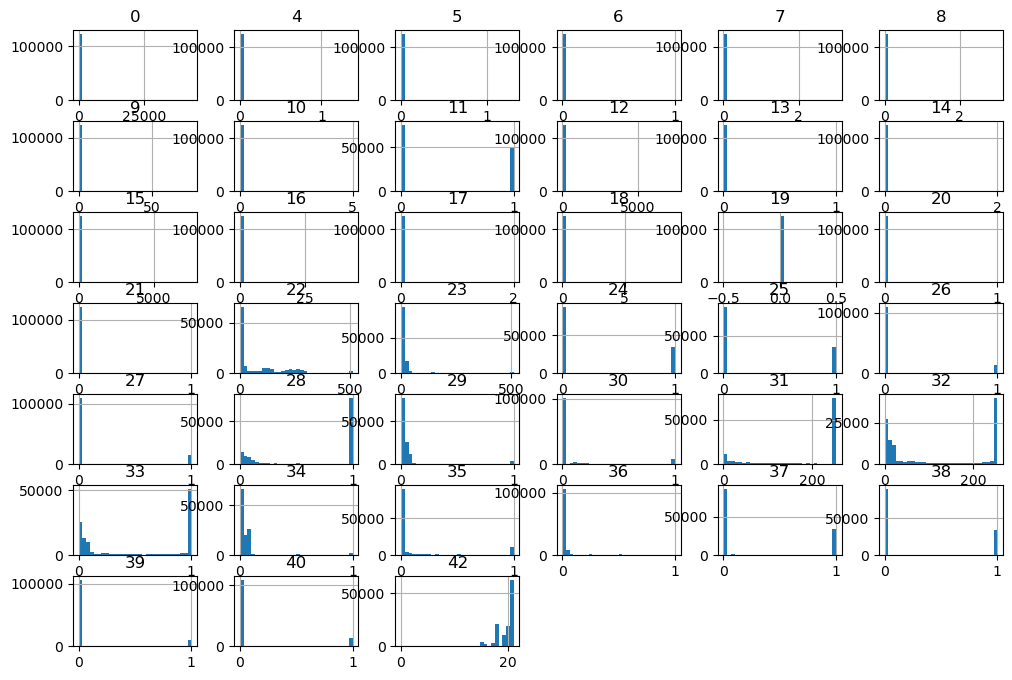

In [ ]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

### Диаграмма рассеяния

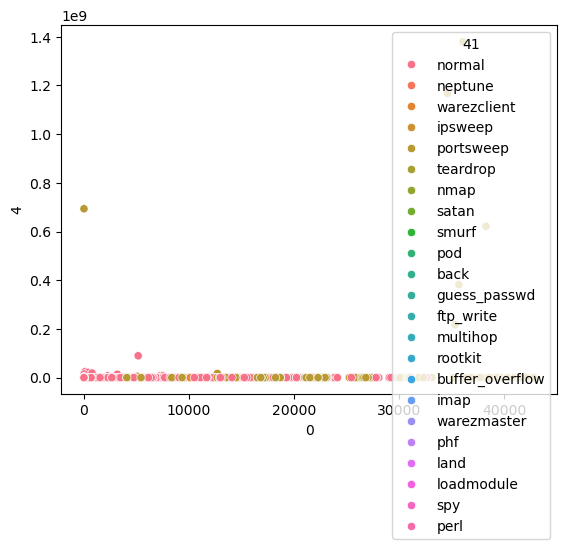

In [ ]:
sns.scatterplot(x=df[0], y=df[4], hue=df[41])
plt.show()

# Тепловая карта корреляции!
Построить тепловую карту нельзя, так как мы не преобразовали категориальные данные в числовые.
Тепловая карта будет построена **после** выполнения кодирования

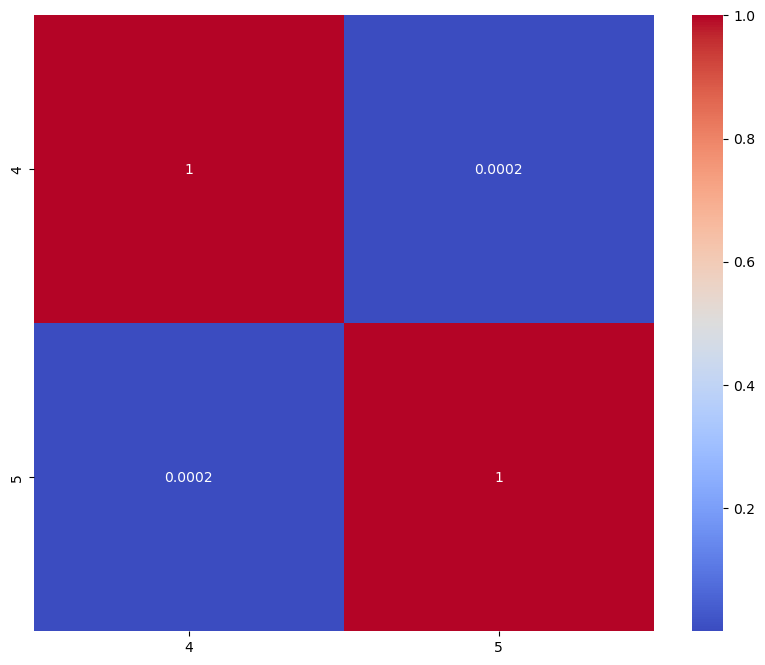

In [ ]:
subset_df = df.iloc[:, [4, 5]]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_df.corr(), annot=True, cmap="coolwarm")
plt.show()

## Предобработка данных

### Кадирование категориальных признаков (**Label Encoding**)

In [ ]:
label_encoder = LabelEncoder()
df[1] = label_encoder.fit_transform(df[1])

### One-Hot Encoding для сервиса и флагов

In [ ]:
df = pd.get_dummies(df, columns=[2, 3]) 

### Нормализация числовых признаков

In [ ]:
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))